# Задание 5

In [5]:
import numpy as np
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
from typing import Callable
import pandas as pd
from random import uniform as rnd
import scipy.integrate as integrate

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Получение многочлена Лежандра

In [6]:
legendre_polynomials = [lambda x: 1., lambda x: x]
def get_Legendre(n: int) -> Callable:
    def constructor(f1: Callable, f2: Callable, k: int) -> Callable:
        def func(x: float) -> float:
            return f1(x) * x * (2 * k - 1) / k - f2(x) * (k - 1) / k
        return func
    while len(legendre_polynomials) <= n:
        i = len(legendre_polynomials)
        next_func = constructor(legendre_polynomials[i-1], legendre_polynomials[i-2], i)
        legendre_polynomials.append(next_func)
    return legendre_polynomials[n]

### Получение корней методом секущих

In [7]:
eps = 1.e-12
def secant_method(f: Callable) -> np.ndarray:
    segments = []

    def get_partition(n: float, a: float, b: float) -> None:
        h = (b - a) / n
        left = a
        for i in range(int(n)):
            right = a + (i + 1) * h
            if f(left) * f(right) < 0:
                segments.append([left, right])
            if f(right) != 0:
                left = right

    get_partition(1.e3, -1, 1)

    def get_random(a: float, b: float) -> float:
        x = rnd(a, b)
        while x == a or x == b:
            x = rnd(a, b)
        return x

    def pure_secants(s: list[float]) -> float:
        x0 = s[0]
        x1 = get_random(x0, s[1])
        x2 = x1 - (f(x1) / (f(x1) - f(x0))) * (x1 - x0)
        while abs(x2 - x1) >= eps:
            x2, x1, x0 = x2 - (f(x2) / (f(x2) - f(x1))) * (x2 - x1), x2, x1
        return x2

    hubs = np.array([pure_secants(segment) for segment in segments])
    return hubs

### Получение коэффициентов КФ Гаусса

In [8]:
def get_gauss_coefficients(hub_list: np.ndarray, n: int) -> np.ndarray:
    Pn1 = get_Legendre(n - 1)
    # Pn = get_Legendre(n)
    # return np.array([2 * (1 - x**2) / (n * (Pn1(x) - x * Pn(x)))**2 for x in hub_list])
    return np.array([2 * (1 - x**2) / (n * Pn1(x))**2 for x in hub_list])

#### Вывод узлов и коэффициентов для КФ Гаусса

In [9]:
def get_hubs_coefficients(n: int) -> pd.DataFrame:
    dfs = {}
    for i in range(1, n + 1):
        P = get_Legendre(i)
        hubs = secant_method(P)
        coefficients = get_gauss_coefficients(hubs, i)
        hubs = np.append(hubs, np.array(['_' for _ in range(n - i)]))
        coefficients = np.append(coefficients, np.array(['_' for _ in range(n - i)]))
        dfs[f"Узлы для N = {i}"] = hubs
        dfs[f"Коэффициенты для N = {i}"] = coefficients
    return pd.DataFrame(dfs, index=[f"X{i+1}" for i in range(n)])

N = 10
df = get_hubs_coefficients(N)
df

,Узлы для N = 1,Коэффициенты для N = 1,Узлы для N = 2,Коэффициенты для N = 2,Узлы для N = 3,Коэффициенты для N = 3,Узлы для N = 4,Коэффициенты для N = 4,Узлы для N = 5,Коэффициенты для N = 5,Узлы для N = 6,Коэффициенты для N = 6,Узлы для N = 7,Коэффициенты для N = 7,Узлы для N = 8,Коэффициенты для N = 8,Узлы для N = 9,Коэффициенты для N = 9,Узлы для N = 10,Коэффициенты для N = 10
X1,0.0,2.0,-0.5773502691896257,1.0000000000000002,-0.7745966692414833,0.5555555555555564,-0.8611363115940526,0.347854845137454,-0.906179845938664,0.23692688505618936,-0.932469514203152,0.171324492379171,-0.9491079123427585,0.1294849661688707,-0.9602898564975362,0.10122853629037791,-0.9681602395076261,0.08127438836157527,-0.973907,0.066671
X2,_,_,0.5773502691896257,1.0000000000000002,0.0,0.8888888888888888,-0.33998104358485626,0.6521451548625463,-0.5384693101056831,0.4786286704993664,-0.6612093864662645,0.3607615730481388,-0.7415311855993945,0.2797053914892766,-0.7966664774136267,0.22238103445337448,-0.8360311073266358,0.1806481606948573,-0.865063,0.149451
X3,_,_,_,_,0.7745966692414834,0.555555555555555,0.33998104358485626,0.6521451548625463,-1.262177448353619e-29,0.5688888888888889,-0.2386191860831969,0.46791393457269126,-0.4058451513773972,0.3818300505051189,-0.525532409916329,0.31370664587788727,-0.6133714327005905,0.2606106964029352,-0.679410,0.219086
X4,_,_,_,_,_,_,0.8611363115940526,0.347854845137454,0.5384693101056831,0.4786286704993664,0.2386191860831969,0.46791393457269126,-3.0292258760486853e-28,0.4179591836734694,-0.1834346424956498,0.36268378337836205,-0.3242534234038089,0.3123470770400029,-0.433395,0.269267
X5,_,_,_,_,_,_,_,_,0.9061798459386641,0.23692688505618795,0.6612093864662645,0.3607615730481388,0.40584515137739713,0.38183005050511903,0.1834346424956498,0.36268378337836205,0.0,0.3302393550012598,-0.148874,0.295524
X6,_,_,_,_,_,_,_,_,_,_,0.932469514203152,0.171324492379171,0.7415311855993945,0.2797053914892766,0.525532409916329,0.31370664587788727,0.3242534234038089,0.3123470770400029,0.148874,0.295524
X7,_,_,_,_,_,_,_,_,_,_,_,_,0.9491079123427585,0.1294849661688707,0.7966664774136267,0.22238103445337448,0.6133714327005904,0.26061069640293555,0.433395,0.269267
X8,_,_,_,_,_,_,_,_,_,_,_,_,_,_,0.9602898564975363,0.10122853629037443,0.8360311073266358,0.1806481606948573,0.679410,0.219086
X9,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,0.9681602395076261,0.08127438836157527,0.865063,0.149451
X10,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,0.973907,0.066671


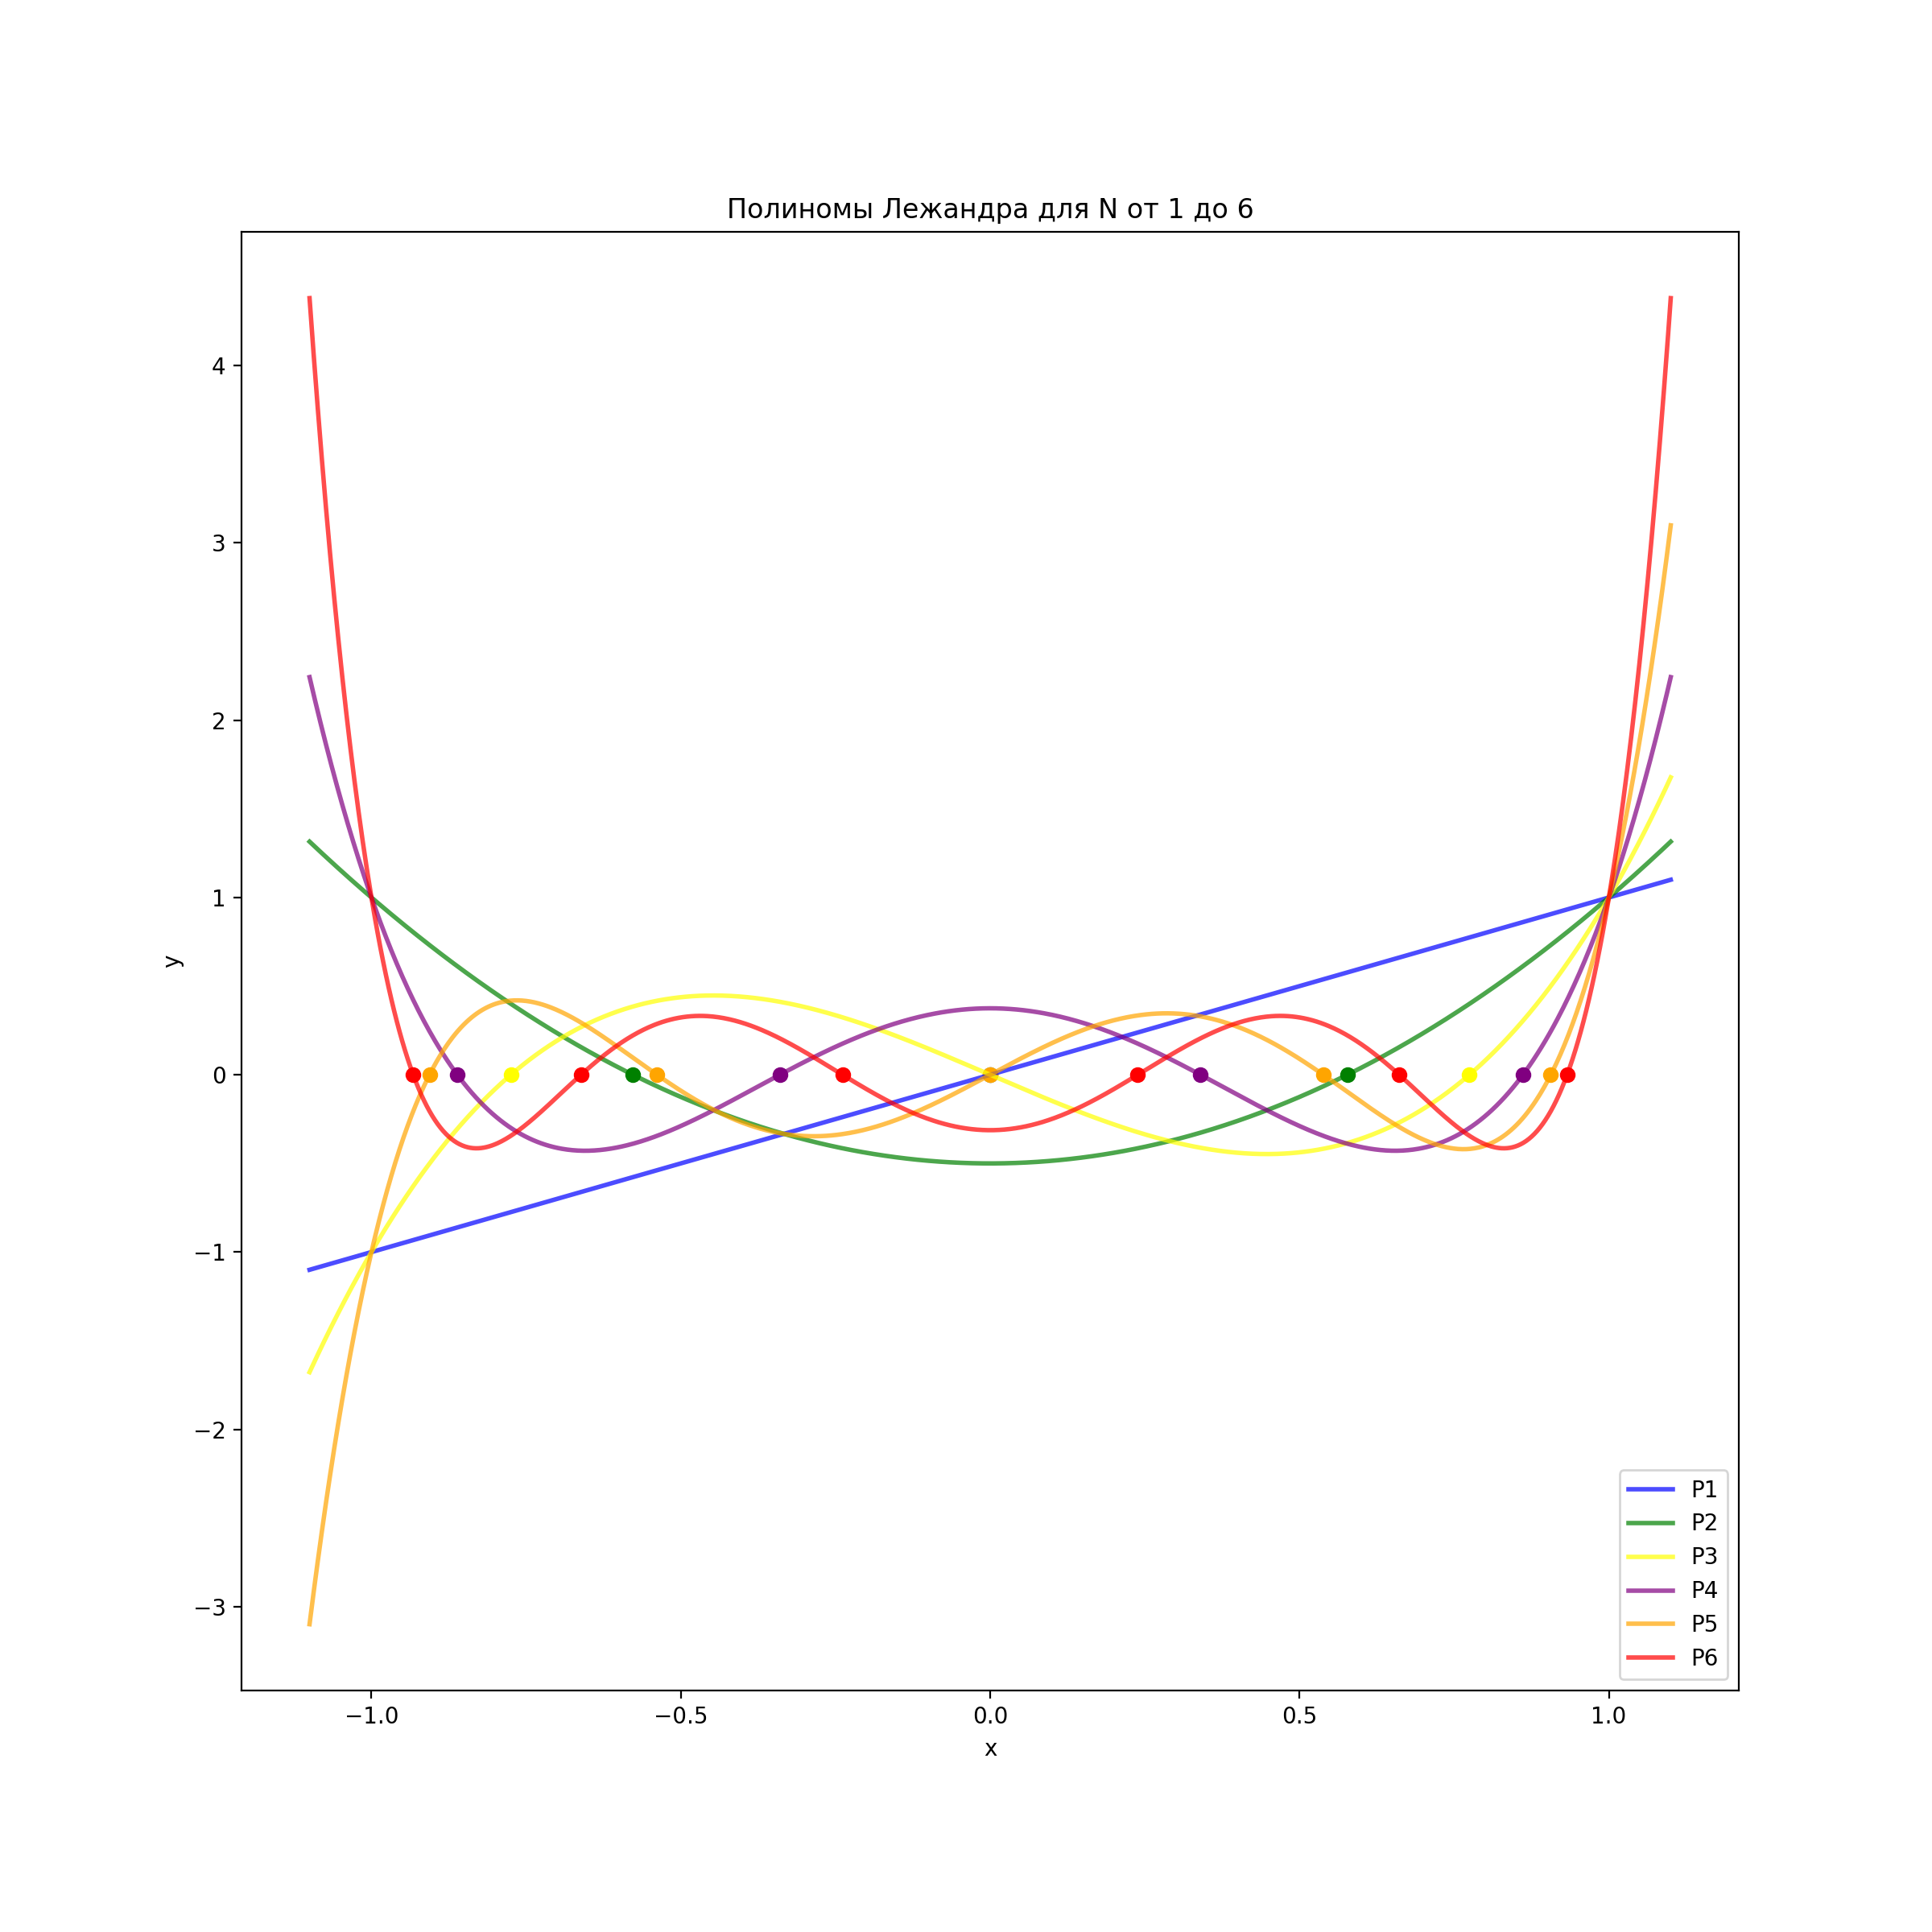

In [10]:
def show_graph(n: int) -> None:
    pts = 1000
    delta = 1.e-1
    X = np.linspace(-1 - delta, 1 + delta, pts)
    starter = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
    colours = [color for color in starter]
    i = 0
    while len(colours) <= n:
        colours.append(starter[i])
        i = (i + 1) % len(starter)

    fig, ax = plt.subplots(figsize=(12, 12), dpi=200)
    for i in range(n):
        f = get_Legendre(i + 1)
        hubs = secant_method(f)
        ax.plot(X, [f(x) for x in X], color=colours[i + 1], alpha=0.7, label=f"P{i + 1}", linewidth=2)
        [ax.scatter(hub, 0, c=colours[i + 1]) for hub in hubs]
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f'Полиномы Лежандра для N от {1} до {n}')
    ax.legend()

    plt.show()

show_graph(6)

#### Реализация КФ Гаусса

In [11]:
def gauss(f: Callable, a: float, b: float, n: int) -> float:
    legendre = get_Legendre(n)
    coefficients = get_gauss_coefficients(secant_method(legendre), n)
    hub_list = np.array([(a + b + (b - a) * t) / 2 for t in secant_method(legendre)])
    S = np.sum([coefficients[i] * f(hub_list[i]) for i in range(len(hub_list))])
    return (b - a) * S / 2

### Реализация получения многочлена заданной степени

In [12]:
class Polynom:
    n: int
    val: Callable
    integral: Callable
    derivative: Callable
    args: list[float]
    s: str
    def __init__(self, n_: int, a_: list[float] = []):
        #                                          setting args
        if a_:
            self.args = [x for x in a_]
        else:
            self.args = [0] * (n_ + 1)
            for i in range(n_ + 1):
                self.args[i] = rnd(-10, 10)
                if i == n_:
                    while self.args[i] == 0:
                        self.args[i] = rnd(-10, 10)
        #                                          setting n
        self.n = n_
        #                                          setting val
        self.val = lambda x: sum([self.args[i] * x**i for i in range(n_ + 1)])
        #                                          setting derivative
        self.derivative = lambda x: sum([self.args[i+1] * x**i * (i+1) for i in range(n_)])
        #                                          setting integral
        self.integral = lambda x: sum([self.args[i-1] * x**i / i for i in range(1, n_+2)])
        #                                          setting s
        view = lambda x: format(x, '.2f')
        self.s = ''
        for i in range(self.n + 1):
            if i == 0:
                self.s += f'{view(self.args[i])}'
            elif i == 1:
                self.s+= f' + {view(self.args[i])} * x'
            else:
                self.s+= f' + {view(self.args[i])} * x^{i}'
    def get_der(self, x: float):
        return self.derivative(x)
    def get_int(self, a: float, b: float):
        return self.integral(b) - self.integral(a)
    def get_val(self, x: float):
        return self.val(x)
    def show(self):
        print(self.s)

### Проверка КФ Гаусса на точность

In [13]:
n = int(input('Введите степень полинома: '))
a = float(input('Введите левую границу интегрирования: '))
b = float(input('Введите правую границу интегрирования: '))
polynom = Polynom(n)
expected = polynom.get_int(a, b)
actual_results = np.array([gauss(polynom.val, a, b, i) for i in range(1, n + 1)])
data = {"Gauss" : actual_results,
      "Error" : np.array([abs(expected - res) for res in actual_results]),
      "Expected": np.array([expected for _ in actual_results])}
df = pd.DataFrame(data=data, index=[f"N={i}" for i in range(1, n+1)])
print(f'Polynom of degree {n}: {polynom.s}')
print(f'Results for an integral from {a} to {b}')
df

Polynom of degree 3: 5.29 + 1.07 * x + 0.82 * x^2 + -4.50 * x^3
Results for an integral from -10.0 to 2.0


,Gauss,Error,Expected
N=1,3626.091448,7.893842e+03,11519.933205
N=2,11519.933205,0.000000e+00,11519.933205
N=3,11519.933205,1.091394e-11,11519.933205


### Нахождение определенного интеграла функции $\sqrt{x}\sin{x^2}$

In [10]:
target_function = lambda x: x**0.5 * np.sin(x**2)
N = [3, 6, 7, 8, 10, 11, 12]
a = float(input('Введите левую границу интегрирования: '))
b = float(input('Введите правую границу интегрирования: '))
expected, error = integrate.quad(target_function, a, b)
actual = np.array([gauss(target_function, a, b, n) for n in N])
data = {'Gauss': actual, 'Gauss Error': np.array([abs(res - expected) for res in actual]), 'Expected': np.array([expected for _ in N]), 'Expected Error': np.array([error for _ in N])}
df = pd.DataFrame(data=data, index=[f'N={n}' for n in N])
print(f'Results for an integral from {a} to {b}')
# для 0 1 вольфрам посчитал: 0.264204040613324...
df

Results for an integral from 0.0 to 1.0


,Gauss,Gauss Error,Expected,Expected Error
N=3,0.264307,1.026214e-04,0.264204,7.868035e-09
N=6,0.264204,3.718308e-07,0.264204,7.868035e-09
N=7,0.264204,1.321446e-07,0.264204,7.868035e-09
N=8,0.264204,5.390004e-08,0.264204,7.868035e-09
N=10,0.264204,1.198663e-08,0.264204,7.868035e-09
N=11,0.264204,6.296716e-09,0.264204,7.868035e-09
N=12,0.264204,3.496666e-09,0.264204,7.868035e-09


### Реализация КФ Мелера

In [11]:
def get_meler_hubs(n: int):
    # print([np.cos(float(np.pi) * float((2*k - 1) / (2*n))) for k in range(1, n+1)])
    return np.array([np.cos(float(np.pi) * (2*k - 1) / (2*n)) for k in range(1, n+1)])

def get_Meler(f: Callable, n: int) -> float:
    hub_list = get_meler_hubs(n)
    S = np.sum([f(float(hub)) for hub in hub_list])
    return np.pi * S / n

### Нахождение $\int_{-1}^{1}\frac{f(x)~dx}{\sqrt{1 - x^2}}$ для $f(x) = \cos(x)(1+x^2)$ с помощью КФ Мелера

In [12]:
def target_function(x: float) -> float:
    return np.cos(x) * (1 + x**2)

N = [int(x) for x in input('Введите все значения для N').split()]
m = max(N)
data = {}
expected = 3.425419173884658
for n in N:
    actual = get_Meler(target_function, n)
    new_column = np.array([actual] + [expected] + [abs(actual - expected)] + [hub for hub in get_meler_hubs(n)])
    new_column = np.append(new_column, ['-' for _ in range(m-n)])
    data[f'N={n}'] = new_column
df = pd.DataFrame(data=data, index=['Meler', 'Expected', 'Error'] + [f"Node {i+1}" for i in range(m)])
df

,N=1,N=2,N=3,N=4,N=5,N=6,N=7,N=8,N=9,N=10,N=11,N=12
Meler,3.141592653589793,3.5825682616561987,3.421726069269235,3.4254511761272783,3.4254190283573323,3.425419174293163,3.4254191738838786,3.4254191738846584,3.4254191738846576,3.425419173884658,3.4254191738846576,3.425419e+00
Expected,3.425419173884658,3.425419173884658,3.425419173884658,3.425419173884658,3.425419173884658,3.425419173884658,3.425419173884658,3.425419173884658,3.425419173884658,3.425419173884658,3.425419173884658,3.425419e+00
Error,0.2838265202948649,0.15714908777154069,0.0036931046154231595,3.200224262034368e-05,1.455273257455758e-07,4.0850478555398695e-10,7.793765632868599e-13,4.440892098500626e-16,4.440892098500626e-16,0.0,4.440892098500626e-16,4.440892e-16
Node 1,6.123233995736766e-17,0.7071067811865476,0.8660254037844387,0.9238795325112867,0.9510565162951535,0.9659258262890683,0.9749279121818236,0.9807852804032304,0.984807753012208,0.9876883405951378,0.9898214418809327,9.914449e-01
Node 2,-,-0.7071067811865475,6.123233995736766e-17,0.38268343236508984,0.5877852522924731,0.7071067811865476,0.7818314824680298,0.8314696123025452,0.8660254037844387,0.8910065241883679,0.9096319953545184,9.238795e-01
Node 3,-,-,-0.8660254037844387,-0.3826834323650897,6.123233995736766e-17,0.25881904510252074,0.4338837391175582,0.5555702330196023,0.6427876096865394,0.7071067811865476,0.7557495743542583,7.933533e-01
Node 4,-,-,-,-0.9238795325112867,-0.587785252292473,-0.25881904510252063,6.123233995736766e-17,0.19509032201612833,0.3420201433256688,0.4539904997395468,0.5406408174555977,6.087614e-01
Node 5,-,-,-,-,-0.9510565162951535,-0.7071067811865475,-0.43388373911755806,-0.1950903220161282,6.123233995736766e-17,0.15643446504023092,0.2817325568414298,3.826834e-01
Node 6,-,-,-,-,-,-0.9659258262890682,-0.7818314824680295,-0.555570233019602,-0.3420201433256685,-0.1564344650402306,2.83276944882399e-16,1.305262e-01
Node 7,-,-,-,-,-,-,-0.9749279121818237,-0.8314696123025453,-0.6427876096865394,-0.45399049973954675,-0.28173255684142967,-1.305262e-01
